In [2]:
import pandas as pd
import seaborn as sb
import os
import numpy as np
import matplotlib.pyplot as plt

res = pd.DataFrame()

In [98]:
r = pd.read_csv('resultsV03.csv')
res = r[1:]
res

,Unnamed: 0,var,vsa,vca,initTime,solveTime,solutions,variables,propagators,propagations,nodes,failures,restarts,peakDepth
1,1,P,anti_first_fail,indomain,0.685657,7.95799,10.0,5925.0,2322.0,4581997.0,71191.0,36794.0,0.0,26.0
2,2,P,anti_first_fail,indomain_max,0.673988,5.29487,4.0,5925.0,2322.0,3966641.0,23917.0,11954.0,0.0,34.0
3,3,P,anti_first_fail,indomain_median,0.698428,5.06141,10.0,5925.0,2322.0,3471483.0,21267.0,10621.0,0.0,25.0
4,4,P,anti_first_fail,indomain_min,0.774093,8.05122,10.0,5925.0,2322.0,4616259.0,68987.0,34482.0,0.0,26.0
5,5,P,anti_first_fail,indomain_random,0.699089,165.02400,7.0,5925.0,2322.0,60713329.0,855163.0,427572.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,scheduling,smallest,indomain_split_random,0.680709,4.84633,10.0,5925.0,2322.0,3537677.0,20919.0,10447.0,0.0,25.0
321,321,ea,anti_first_fail,indomain,0.701106,180.24500,0.0,5925.0,2322.0,167453913.0,1305507.0,701103.0,0.0,25.0
322,322,ea,anti_first_fail,indomain_max,0.832448,180.25000,0.0,5925.0,2322.0,123602234.0,568992.0,284490.0,0.0,27.0
323,323,ea,anti_first_fail,indomain_median,0.680075,180.24500,0.0,5925.0,2322.0,168370320.0,1376693.0,688340.0,0.0,25.0


Elimino i valori che hano un tempo di risoluzione maggiore di 180(probabilmente hanno raggiunto il timeout)

In [4]:
df_val = res[res['solveTime'] < 180].copy()
df_val = df_val.reset_index()
df_val = df_val.drop(columns=['index','Unnamed: 0', 'variables', 'propagators', 'restarts'])

Conto i valori, pre diverse categorie che hanno un tempo di risoluzione minore di 5 secondi. 
### Si può vedere come scheduling sembri avere dei tempi tendenzialmente migliori di altri

In [77]:
df_val[df_val['solveTime'] < 4.9].sort_values(by=['solveTime'])

,var,vsa,vca,initTime,solveTime,solutions,propagations,nodes,failures,peakDepth
64,P,occurrence,indomain_reverse_split,0.674926,4.45827,3.0,3717134.0,20715.0,10353.0,35.0
60,P,occurrence,indomain_max,0.676076,4.60084,3.0,3913874.0,21907.0,10949.0,35.0
198,scheduling,largest,indomain_reverse_split,0.676157,4.78073,6.0,3546574.0,19709.0,9847.0,33.0
185,scheduling,input_order,indomain,0.675920,4.78292,10.0,3537317.0,20919.0,10447.0,25.0
193,scheduling,largest,indomain,0.681472,4.78605,10.0,3549530.0,20919.0,10447.0,25.0
209,scheduling,most_constrained,indomain,0.677303,4.78660,10.0,3537317.0,20919.0,10447.0,25.0
208,scheduling,max_regret,indomain_split_random,0.686727,4.78753,10.0,3537317.0,20919.0,10447.0,25.0
168,scheduling,dom_w_deg,indomain_split_random,0.676138,4.78953,10.0,3537317.0,20919.0,10447.0,25.0
68,P,smallest,indomain_max,0.677304,4.79146,6.0,3575236.0,19717.0,9851.0,33.0
215,scheduling,most_constrained,indomain_split,0.683001,4.79300,10.0,3537317.0,20919.0,10447.0,25.0


In [45]:
#df_val[df_val['solveTime'] == df_val['solveTime'].min()]
df_val[df_val['solveTime']< 5].groupby(by=['var']).count()

,vsa,vca,initTime,solveTime,solutions,propagations,nodes,failures,peakDepth
var,,,,,,,,,
P,8,8,8,8,8,8,8,8,8
scheduling,57,57,57,57,57,57,57,57,57


In [48]:
df_val[df_val['solveTime']< 5].groupby(by=['vsa']).count()

,var,vca,initTime,solveTime,solutions,propagations,nodes,failures,peakDepth
vsa,,,,,,,,,
anti_first_fail,7,7,7,7,7,7,7,7,7
dom_w_deg,7,7,7,7,7,7,7,7,7
first_fail,4,4,4,4,4,4,4,4,4
impact,7,7,7,7,7,7,7,7,7
input_order,7,7,7,7,7,7,7,7,7
largest,7,7,7,7,7,7,7,7,7
max_regret,2,2,2,2,2,2,2,2,2
most_constrained,5,5,5,5,5,5,5,5,5
occurrence,9,9,9,9,9,9,9,9,9


In [49]:
df_val[df_val['solveTime']< 5].groupby(by=['vca']).count()

,var,vsa,initTime,solveTime,solutions,propagations,nodes,failures,peakDepth
vca,,,,,,,,,
indomain,11,11,11,11,11,11,11,11,11
indomain_max,9,9,9,9,9,9,9,9,9
indomain_median,8,8,8,8,8,8,8,8,8
indomain_min,9,9,9,9,9,9,9,9,9
indomain_reverse_split,10,10,10,10,10,10,10,10,10
indomain_split,8,8,8,8,8,8,8,8,8
indomain_split_random,10,10,10,10,10,10,10,10,10


In [7]:
#df_val

<AxesSubplot:xlabel='vsa', ylabel='solveTime'>

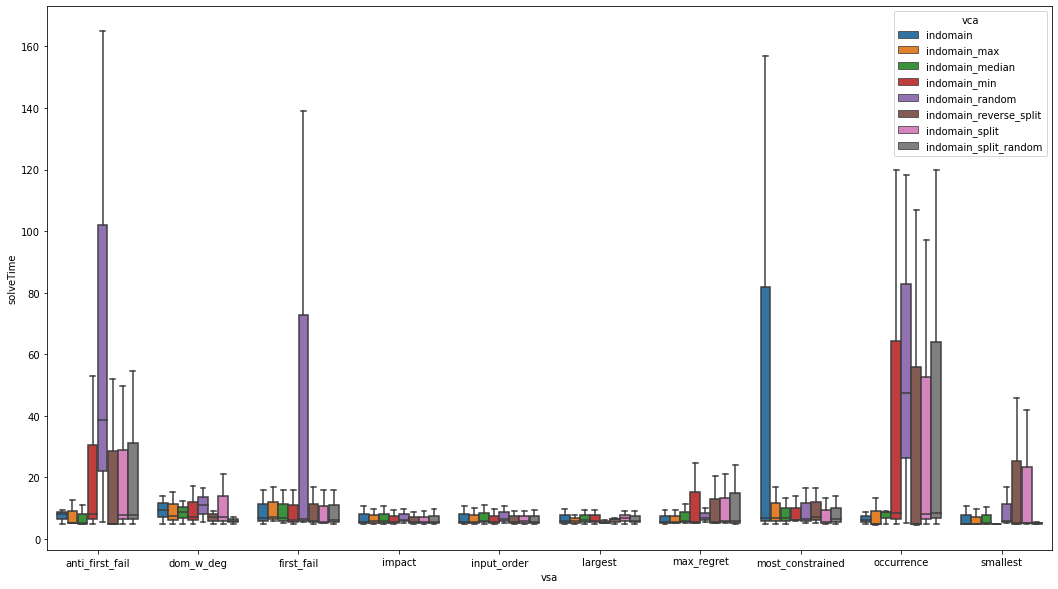

In [53]:
f = plt.figure(figsize=(18,10))
gs = f.add_gridspec(1,1)
ax = f.add_subplot(gs[0, 0])
sb.boxplot(x=df_val['vsa'], y=df_val['solveTime'], hue=df_val['vca'])

<AxesSubplot:xlabel='vca', ylabel='solveTime'>

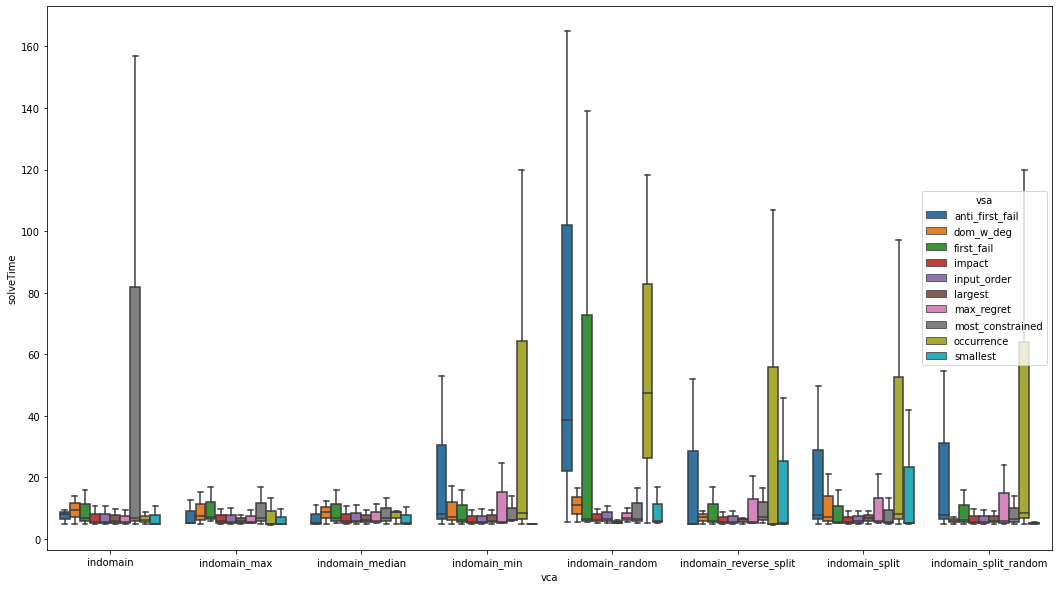

In [54]:
f = plt.figure(figsize=(18,10))
gs = f.add_gridspec(1,1)
ax = f.add_subplot(gs[0, 0])
sb.boxplot(x=df_val['vca'], y=df_val['solveTime'], hue=df_val['vsa'])

<AxesSubplot:xlabel='vca,vsa'>

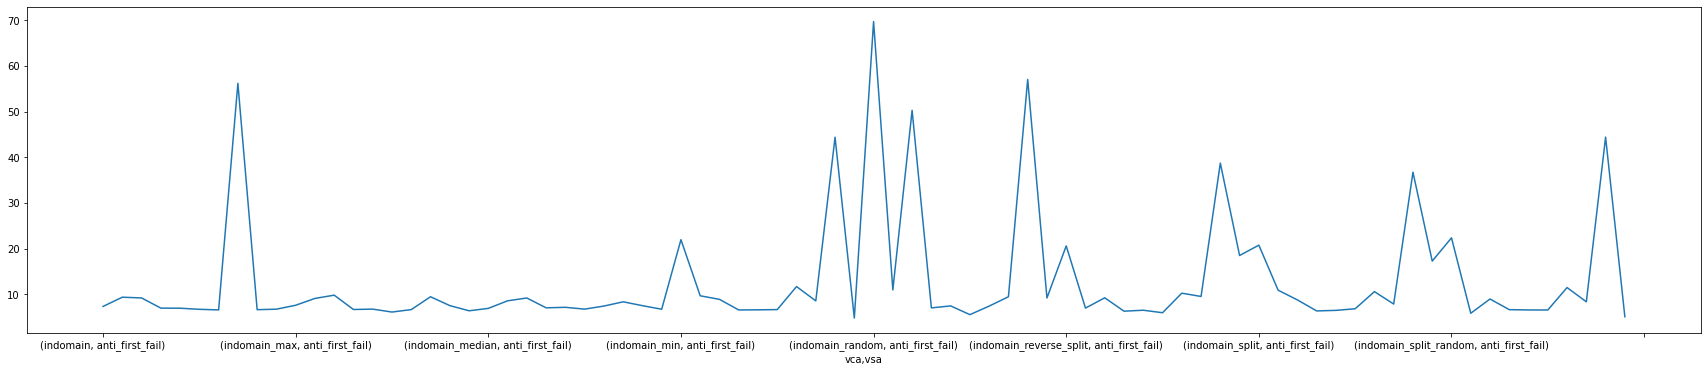

In [66]:
df_val.groupby(['vca','vsa']).mean(['solveTime'])['solveTime'].plot(figsize=(30,6))

<AxesSubplot:xlabel='vsa', ylabel='failures'>

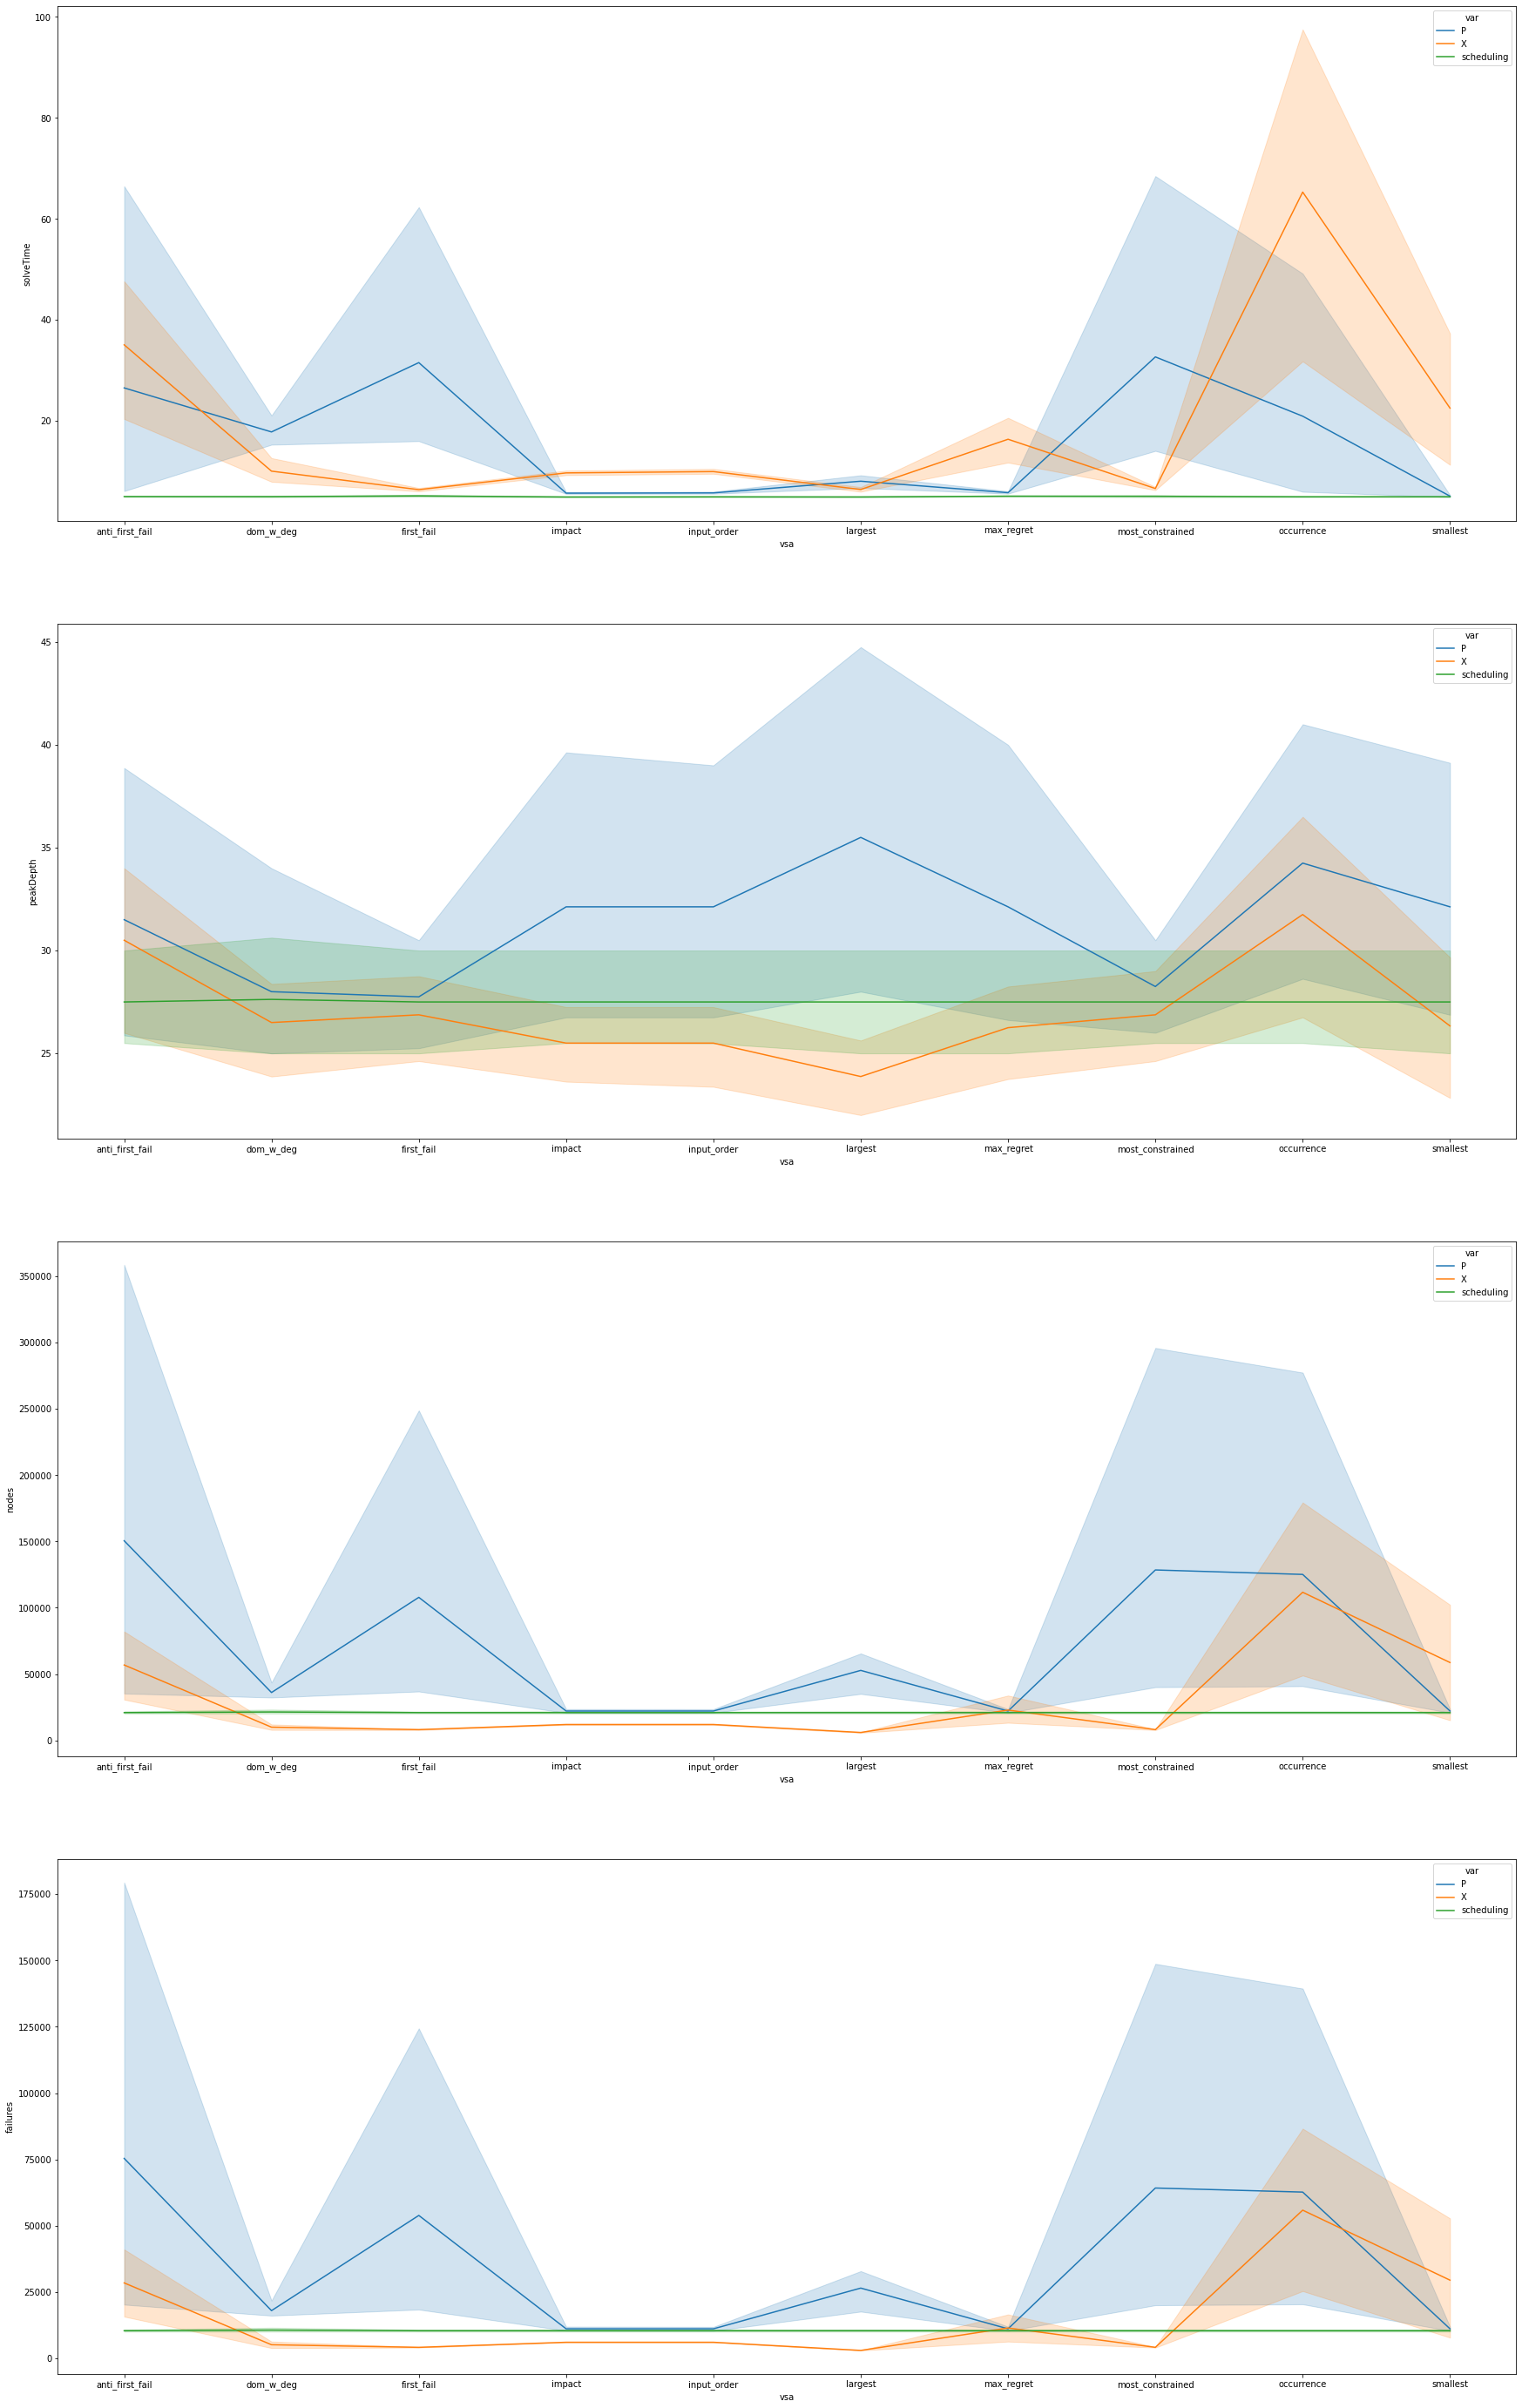

In [28]:
f = plt.figure(figsize=(30, 50))
gs = f.add_gridspec(4, 1)
ax = f.add_subplot(gs[0, 0])
sb.lineplot(x=df_val['vsa'], y=df_val['solveTime'], hue=df_val['var'])
ax = f.add_subplot(gs[1, 0])
sb.lineplot(x=df_val['vsa'], y=df_val['peakDepth'], hue=df_val['var'])
ax = f.add_subplot(gs[2, 0])
sb.lineplot(x=df_val['vsa'], y=df_val['nodes'], hue=df_val['var'])
ax = f.add_subplot(gs[3, 0])
sb.lineplot(x=df_val['vsa'], y=df_val['failures'], hue=df_val['var'])

<AxesSubplot:xlabel='vsa', ylabel='failures'>

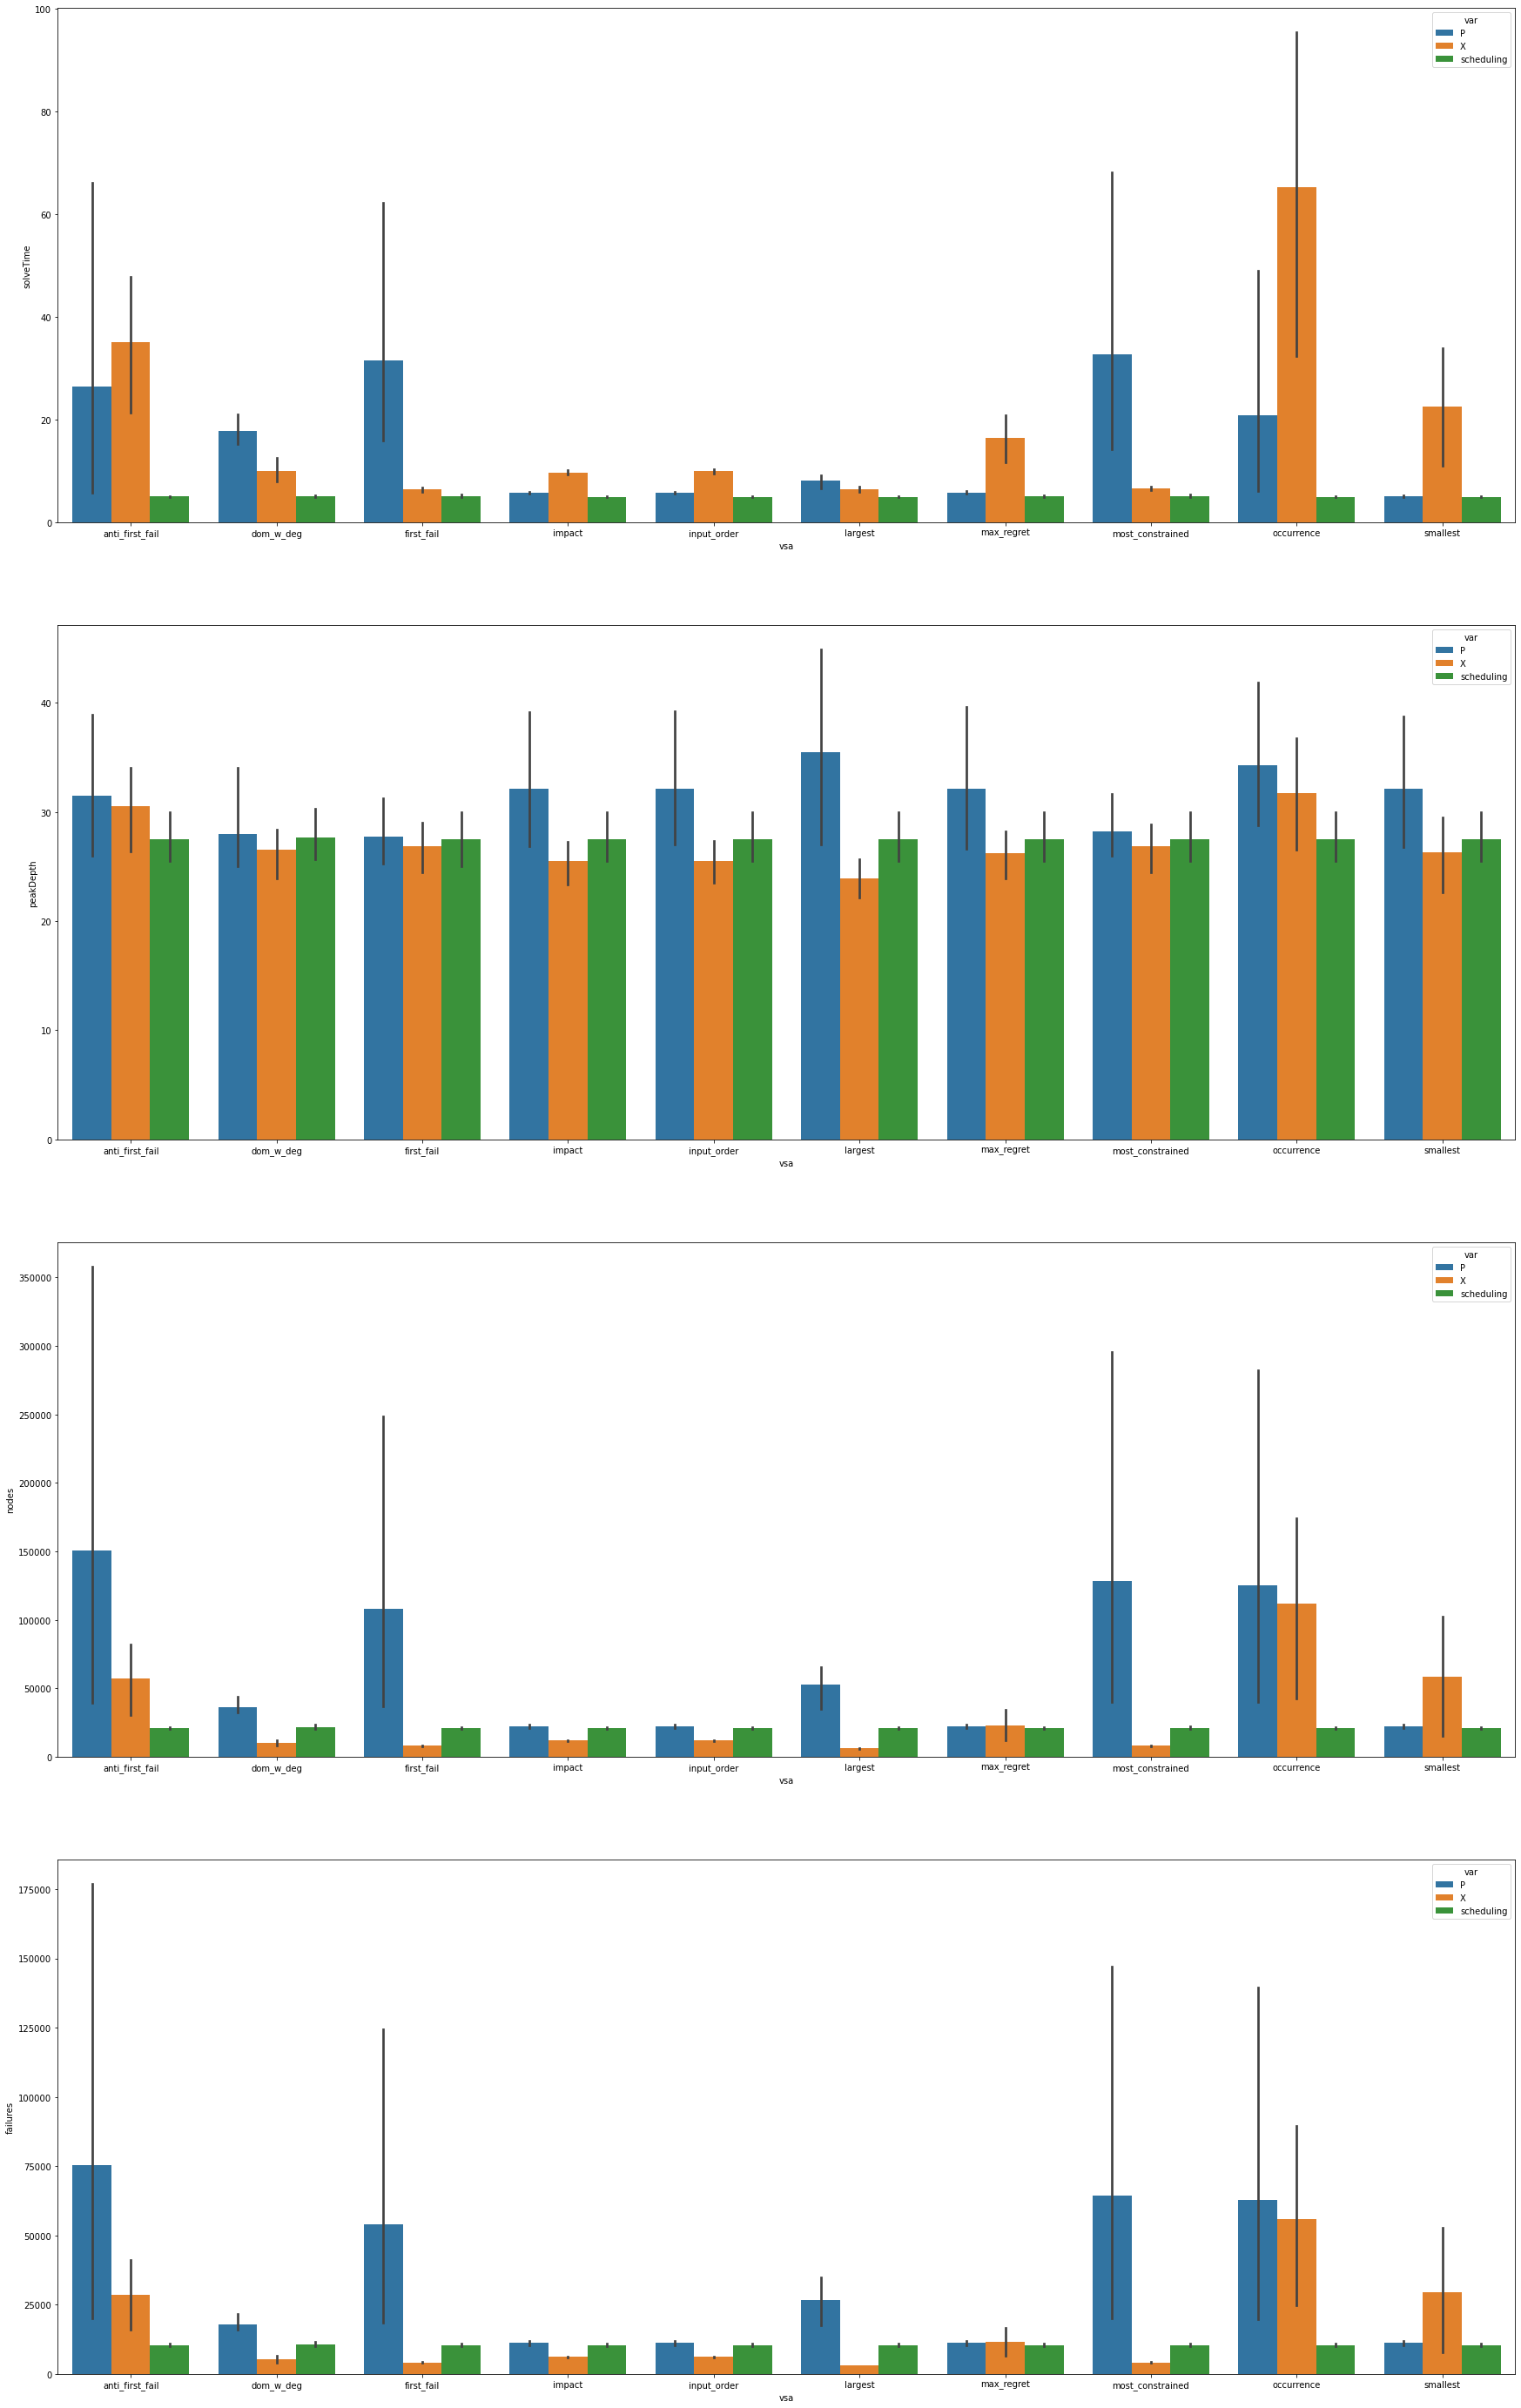

In [27]:
f = plt.figure(figsize=(30, 50))
gs = f.add_gridspec(4, 1)
ax = f.add_subplot(gs[0, 0])
sb.barplot(x=df_val['vsa'], y=df_val['solveTime'], hue=df_val['var'])
ax = f.add_subplot(gs[1, 0])
sb.barplot(x=df_val['vsa'], y=df_val['peakDepth'], hue=df_val['var'])
ax = f.add_subplot(gs[2, 0])
sb.barplot(x=df_val['vsa'], y=df_val['nodes'], hue=df_val['var'])
ax = f.add_subplot(gs[3, 0])
sb.barplot(x=df_val['vsa'], y=df_val['failures'], hue=df_val['var'])

<AxesSubplot:xlabel='var', ylabel='failures'>

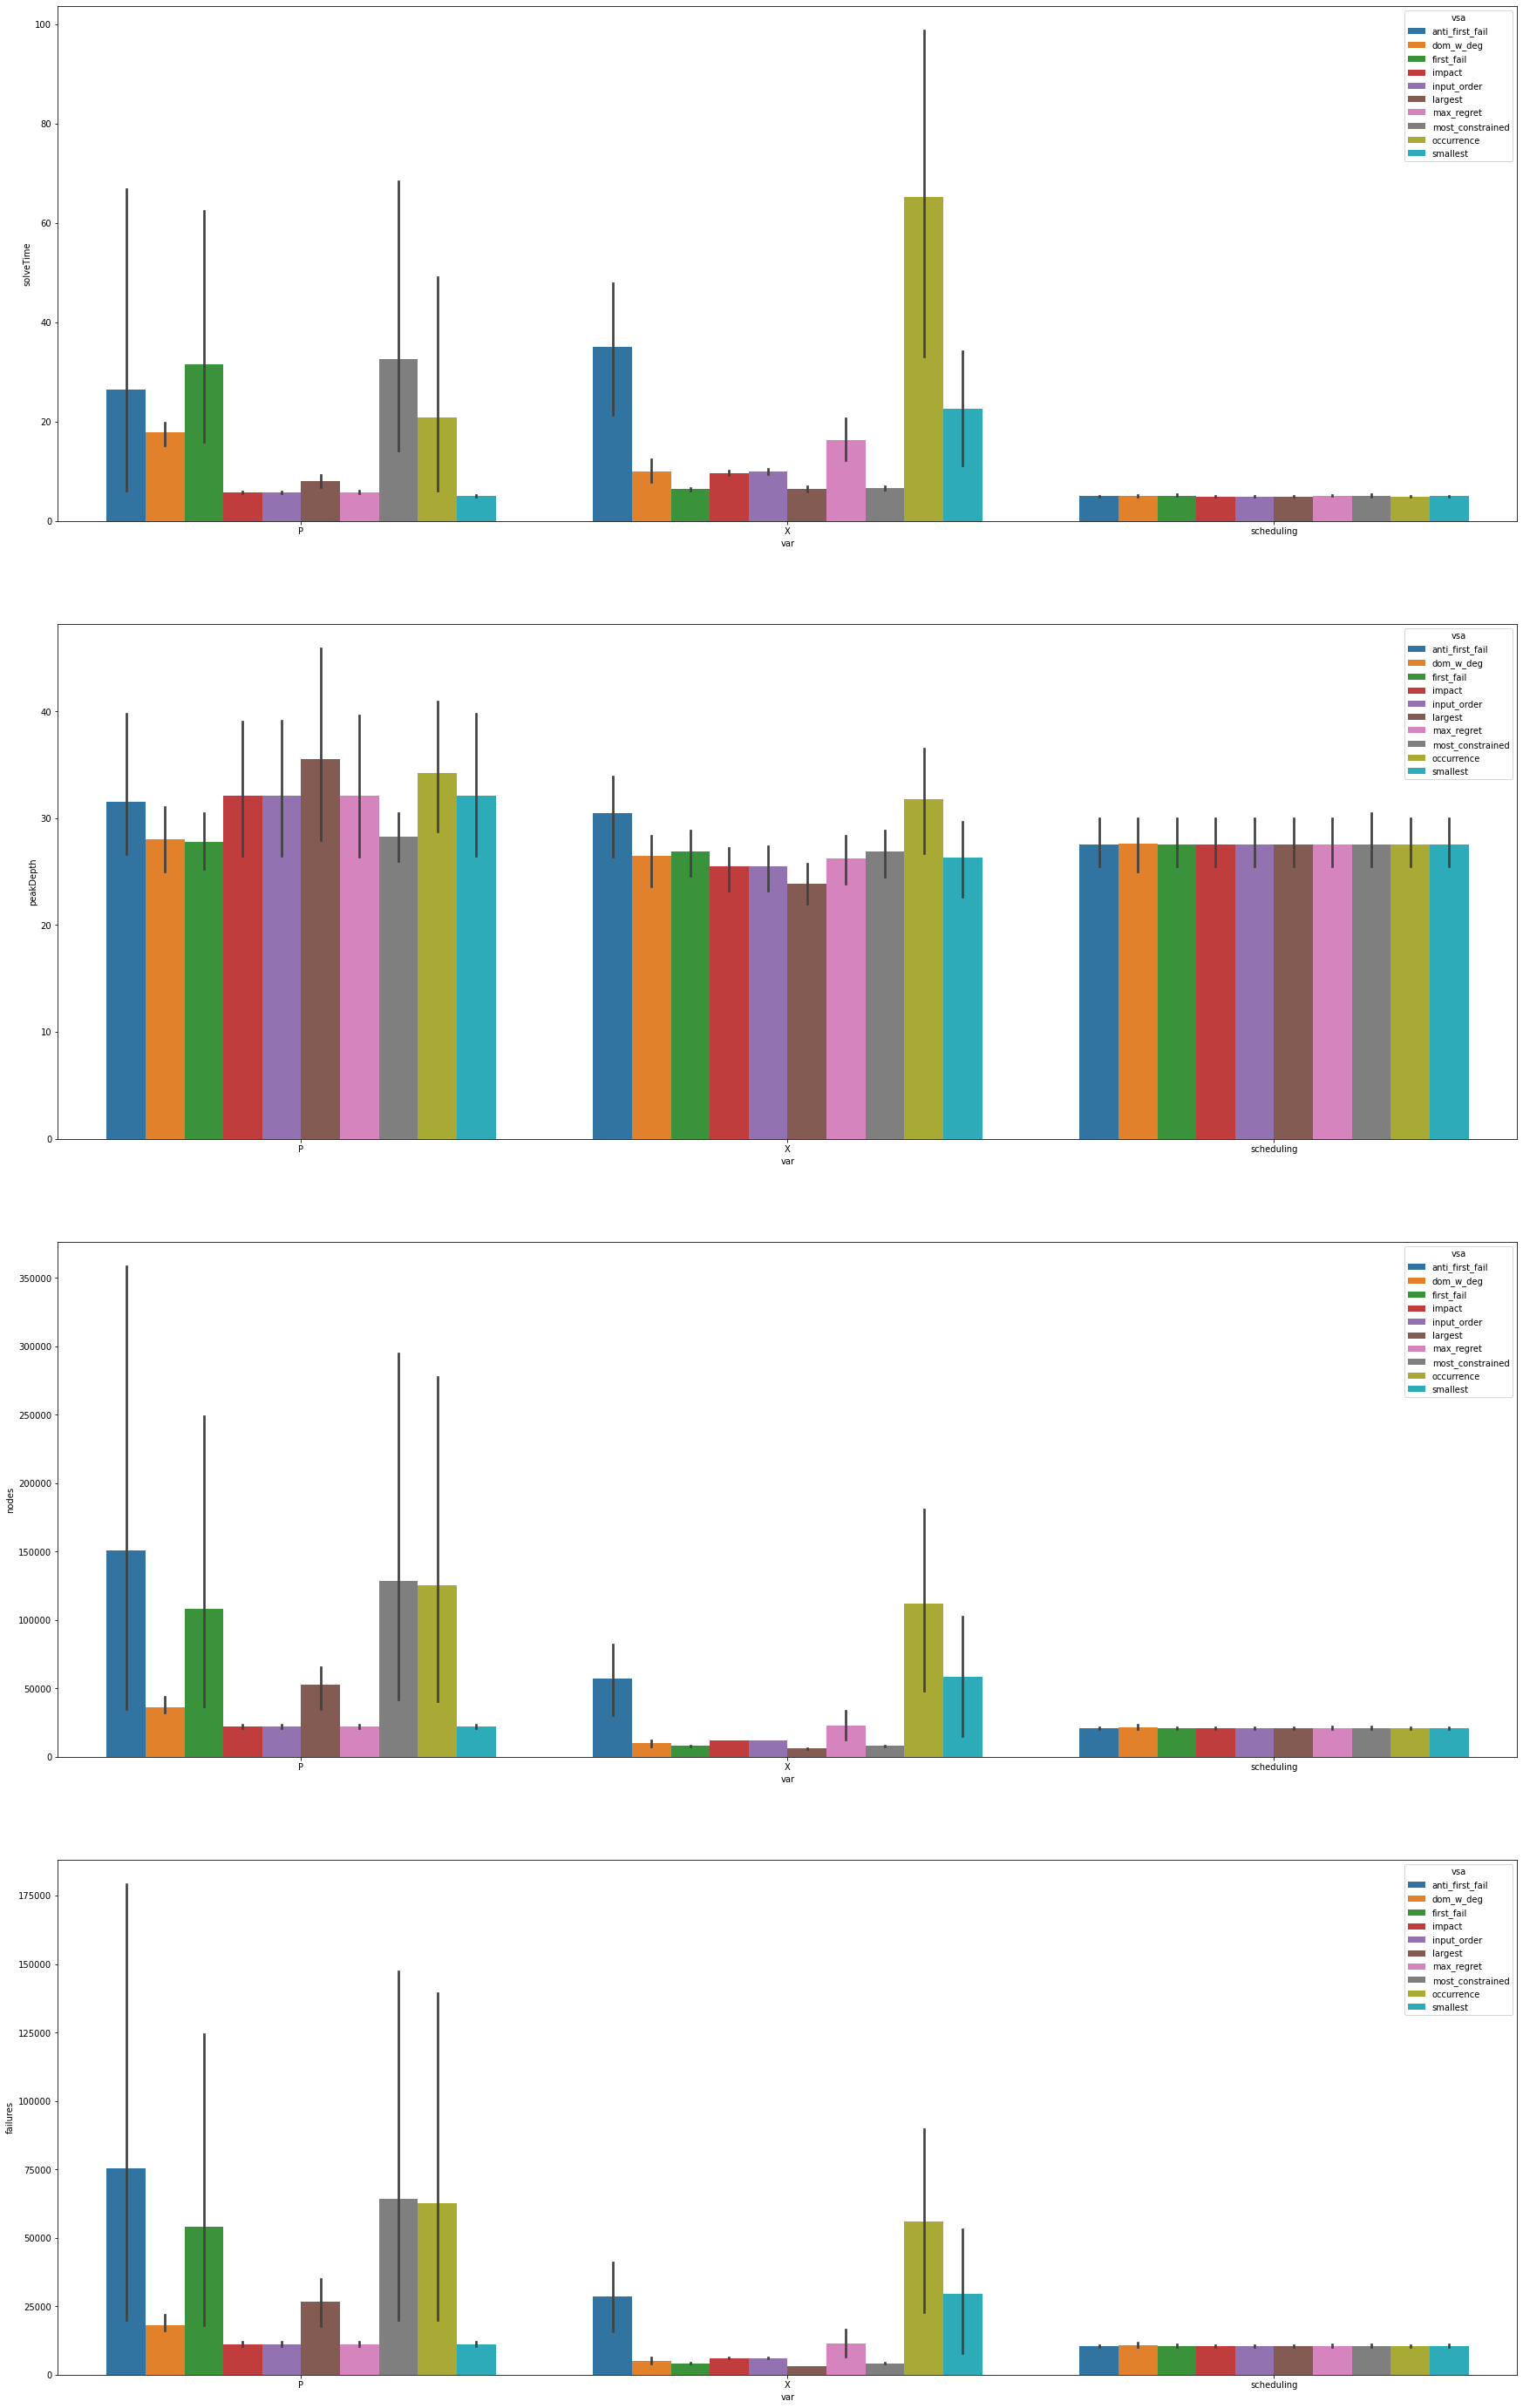

In [51]:
f = plt.figure(figsize=(30, 50))
gs = f.add_gridspec(4, 1)
ax = f.add_subplot(gs[0, 0])
sb.barplot(x=df_val['var'], y=df_val['solveTime'], hue=df_val['vsa'])
ax = f.add_subplot(gs[1, 0])
sb.barplot(x=df_val['var'], y=df_val['peakDepth'], hue=df_val['vsa'])
ax = f.add_subplot(gs[2, 0])
sb.barplot(x=df_val['var'], y=df_val['nodes'], hue=df_val['vsa'])
ax = f.add_subplot(gs[3, 0])
sb.barplot(x=df_val['var'], y=df_val['failures'], hue=df_val['vsa'])

<AxesSubplot:xlabel='var', ylabel='failures'>

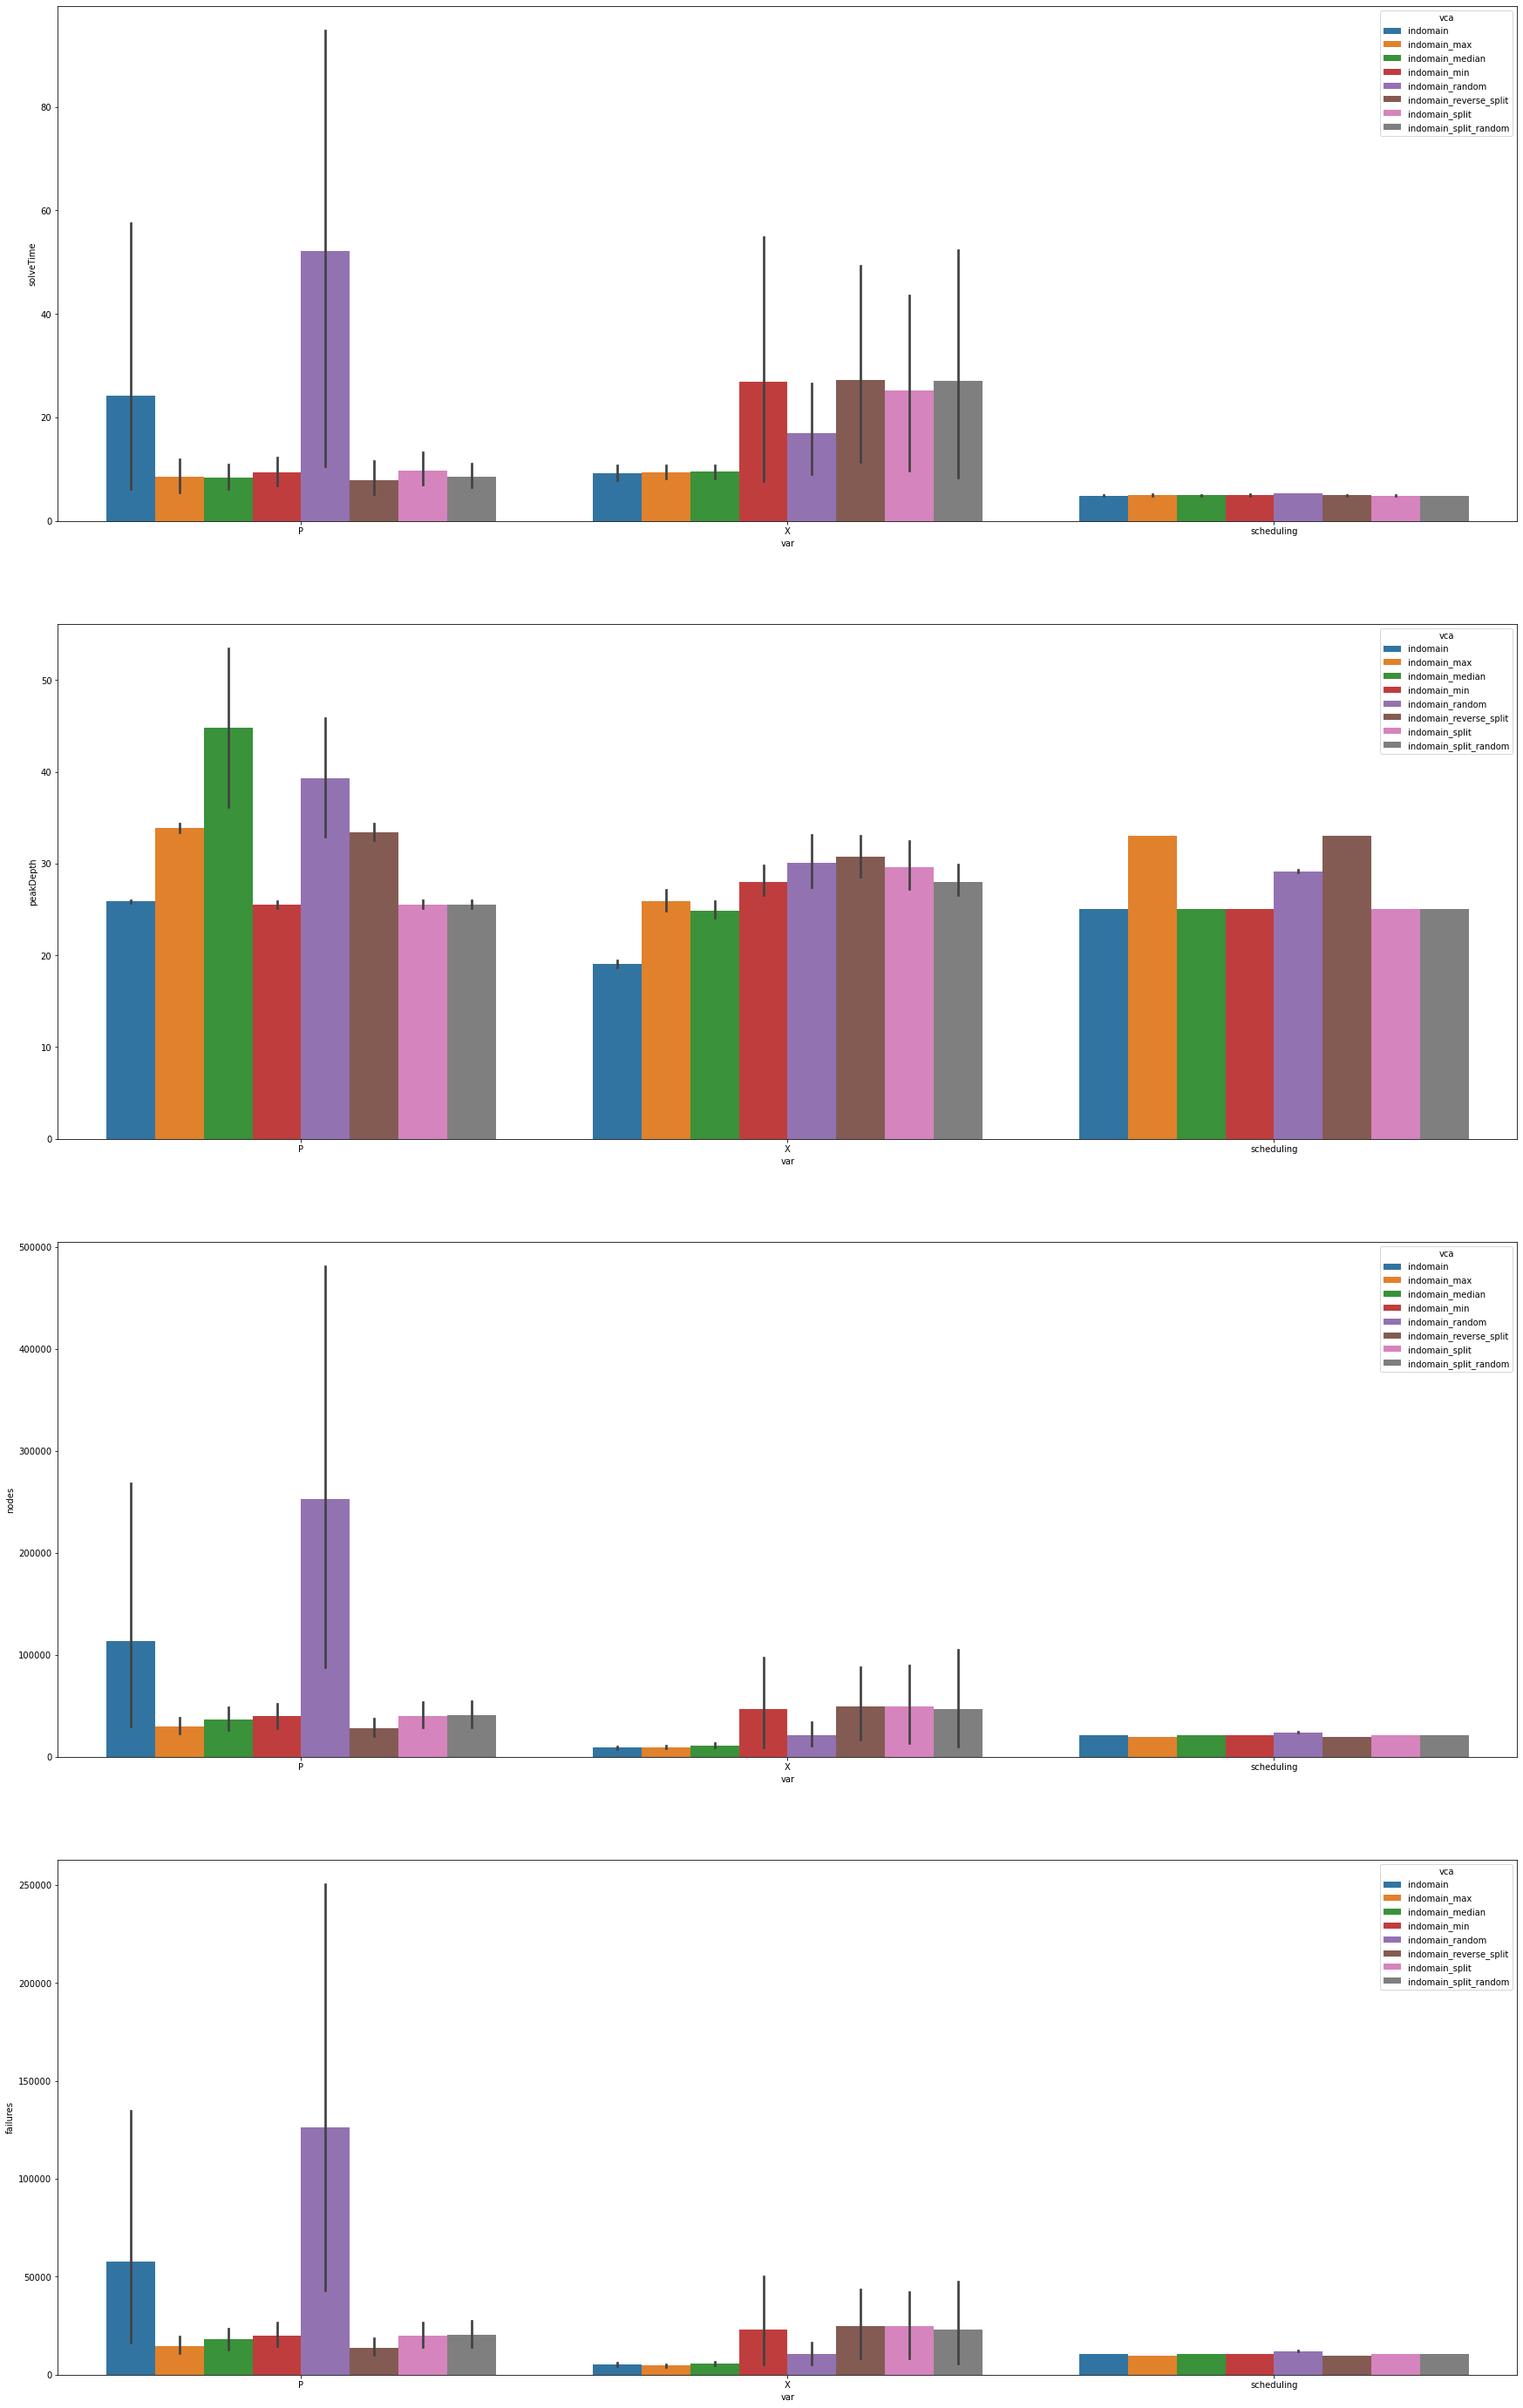

In [52]:
f = plt.figure(figsize=(30, 50))
gs = f.add_gridspec(4, 1)
ax = f.add_subplot(gs[0, 0])
sb.barplot(x=df_val['var'], y=df_val['solveTime'], hue=df_val['vca'])
ax = f.add_subplot(gs[1, 0])
sb.barplot(x=df_val['var'], y=df_val['peakDepth'], hue=df_val['vca'])
ax = f.add_subplot(gs[2, 0])
sb.barplot(x=df_val['var'], y=df_val['nodes'], hue=df_val['vca'])
ax = f.add_subplot(gs[3, 0])
sb.barplot(x=df_val['var'], y=df_val['failures'], hue=df_val['vca'])

<AxesSubplot:>

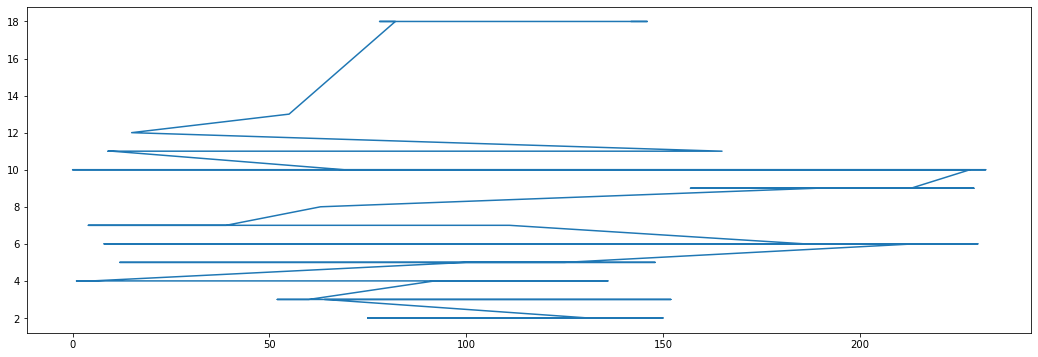

In [85]:
df_val.sort_values(by=['solutions'])['solutions'].plot(figsize=(18,6))

In [97]:
df_val.groupby('var')['solveTime'].describe()

,count,mean,std,min,25%,50%,75%,max
var,,,,,,,,
P,75.0,15.836493,31.392322,4.45827,5.508445,6.26105,13.60190,165.02400
X,78.0,18.717475,24.966060,5.44775,6.903265,9.52231,13.07110,120.00400
scheduling,80.0,4.979467,0.208036,4.78073,4.844012,4.92469,5.02786,5.77504
